### Importing Libraries

In [276]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score,StratifiedKFold

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
#import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import os

Importing Data File

In [277]:

dir_path = os.getcwd()


# Load dataset
dataFrame = pd.read_csv('../../AIBetic2Dataset/v2_diabetes_data.csv')


In [278]:

#Showing head of the dataset
dataFrame.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [279]:

#Showing null values 
dataFrame.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [280]:


#Showing the type of the dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1072 non-null   int64 
 1   Gender              1072 non-null   object
 2   Polyuria            1072 non-null   object
 3   Polydipsia          1072 non-null   object
 4   sudden weight loss  1072 non-null   object
 5   weakness            1072 non-null   object
 6   Polyphagia          1072 non-null   object
 7   Genital thrush      1072 non-null   object
 8   visual blurring     1072 non-null   object
 9   Itching             1072 non-null   object
 10  Irritability        1072 non-null   object
 11  delayed healing     1072 non-null   object
 12  partial paresis     1072 non-null   object
 13  muscle stiffness    1072 non-null   object
 14  Alopecia            1072 non-null   object
 15  Obesity             1072 non-null   object
 16  class               1072

### Distribution of Different Features

<Axes: xlabel='class', ylabel='count'>

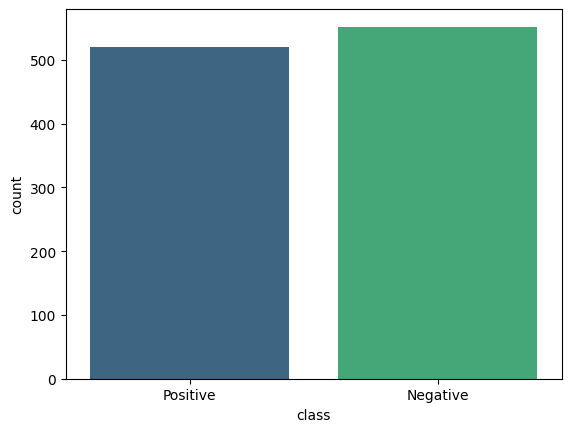

In [281]:
# Create a count plot for the 'class' column of the DataFrame
class_distribution_plot = sns.countplot(x='class', hue='class', data=dataFrame, palette='viridis', legend=False)

# Display the plot
class_distribution_plot


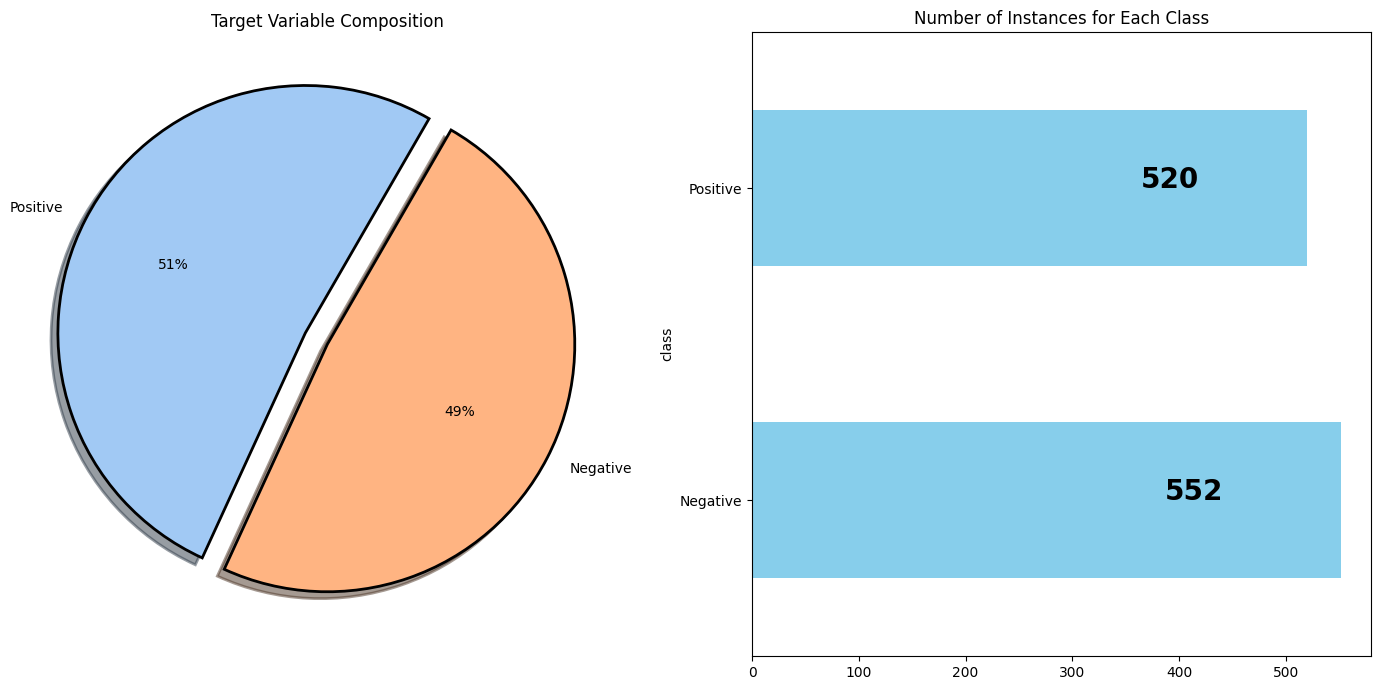

In [282]:


# Create a new figure and axes for the subplots
figure, subplot_axes = plt.subplots(1, 2, figsize=(14,7))

# Compute the counts of each class
class_counts = dataFrame['class'].value_counts()

# Define the color palette and explode parameters
color_palette_pie = sns.color_palette("pastel", 7)
explode_params = [0.1, 0]

# Create a pie chart on the first subplot with the new color palette
subplot_axes[0].pie(class_counts, autopct='%1.0f%%', startangle=60, labels=["Positive","Negative"], colors=color_palette_pie, explode=explode_params, shadow=True, wedgeprops={"linewidth":2,"edgecolor":"k"})
subplot_axes[0].set_title("Target Variable Composition")

# Create a bar plot on the second subplot with a different color
class_counts.plot(kind='barh', ax=subplot_axes[1], color='skyblue',legend=False)
for idx, val in enumerate(class_counts.values):
    subplot_axes[1].text(val * 0.7, idx, str(val), weight='bold', fontsize=20)
subplot_axes[1].set_title("Number of Instances for Each Class")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

class,Negative,Positive
Gender,,
Female,46.920000,50.190000
Male,53.080000,49.810000


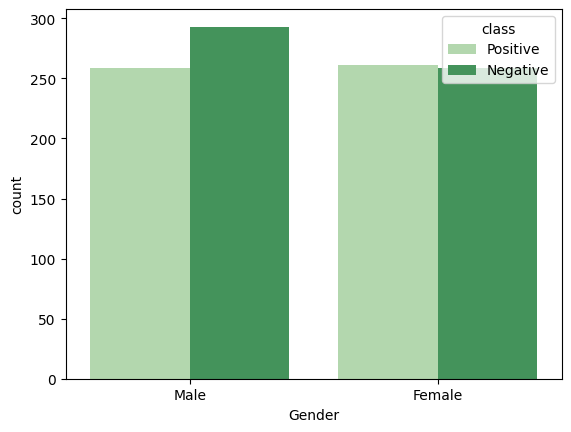

In [283]:


# Visualising the distribution of Gender
gender_plot = sns.countplot(x=dataFrame['Gender'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Gender', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [284]:
#Analysis based on Gender
dataFrame.groupby("Gender")["class"].value_counts().unstack()

class,Negative,Positive
Gender,,
Female,259,261
Male,293,259


Females in the dataset turned out to be more more positive

class,Negative,Positive
Polyuria,,
No,91.120000,23.850000
Yes,8.880000,76.150000


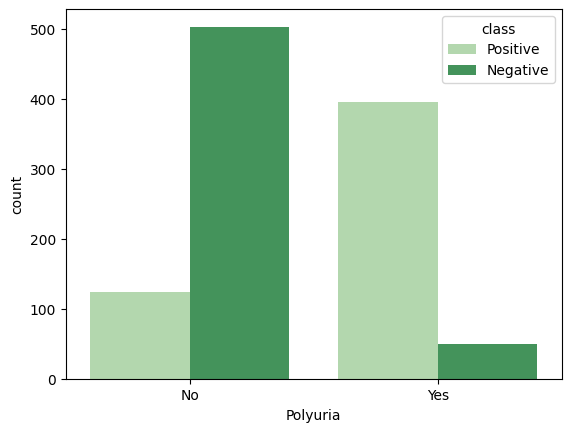

In [285]:
# Visualising the distribution of Polyuria
polyuria_plot = sns.countplot(x=dataFrame['Polyuria'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polyuria', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalising the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [286]:
#Analysis based on Polyuria
dataFrame.groupby("Polyuria")["class"].value_counts().unstack()

class,Negative,Positive
Polyuria,,
No,503,124
Yes,49,396


class,Negative,Positive
Polydipsia,,
No,95.650000,29.420000
Yes,4.350000,70.580000


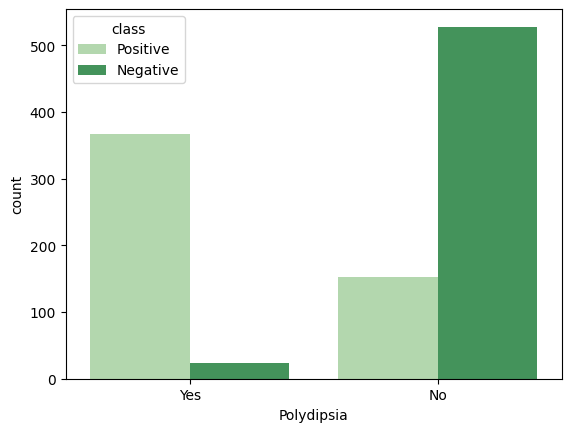

In [287]:


# Visualising the distribution of Polydipsia
polydipsia_plot = sns.countplot(x=dataFrame['Polydipsia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polydipsia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [288]:
#Analysis based on Polydipsia
dataFrame.groupby("Polydipsia")["class"].value_counts().unstack()

class,Negative,Positive
Polydipsia,,
No,528,153
Yes,24,367


class,Negative,Positive
sudden weight loss,,
No,84.600000,40.580000
Yes,15.400000,59.420000


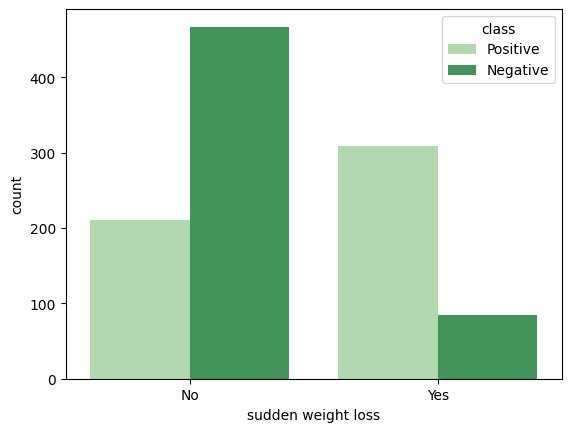

In [289]:


# Visualising the distribution of sudden weight loss
sudden_weight_loss_plot = sns.countplot(x=dataFrame['sudden weight loss'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['sudden weight loss', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [290]:
#Analysis based on sudden weight loss
dataFrame.groupby("sudden weight loss")["class"].value_counts().unstack()

class,Negative,Positive
sudden weight loss,,
No,467,211
Yes,85,309


class,Negative,Positive
weakness,,
No,54.710000,30.000000
Yes,45.290000,70.000000


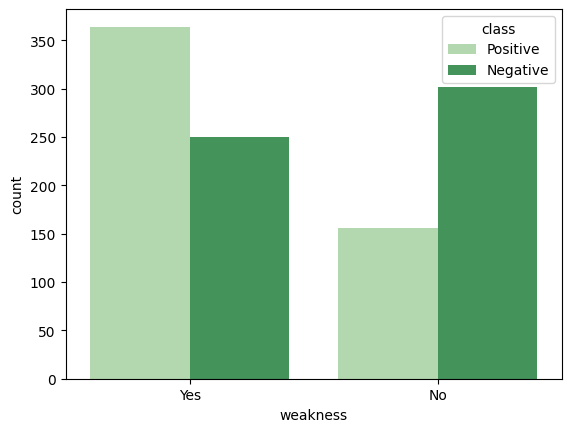

In [291]:


# Visualising the distribution of weakness
weakness_plot = sns.countplot(x=dataFrame['weakness'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['weakness', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [292]:
#Analysis based on  weakness
dataFrame.groupby("weakness")["class"].value_counts().unstack()

class,Negative,Positive
weakness,,
No,302,156
Yes,250,364


class,Negative,Positive
Polyphagia,,
No,76.270000,40.770000
Yes,23.730000,59.230000


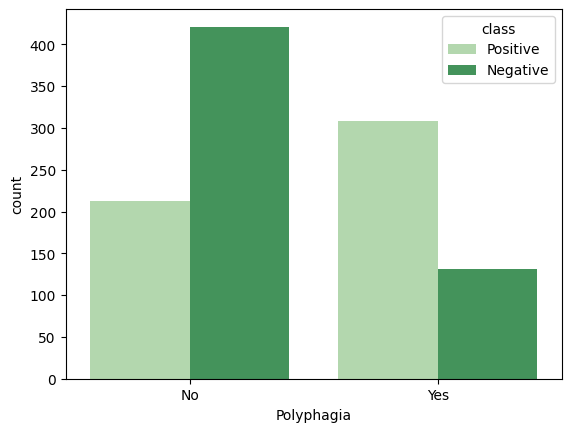

In [293]:


# Visualising the distribution of Polyphagia
polyphagia_plot = sns.countplot(x=dataFrame['Polyphagia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Polyphagia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [294]:
#Analysis based on Polyphagia
dataFrame.groupby("Polyphagia")["class"].value_counts().unstack()

class,Negative,Positive
Polyphagia,,
No,421,212
Yes,131,308


class,Negative,Positive
Genital thrush,,
No,83.510000,72.690000
Yes,16.490000,27.310000


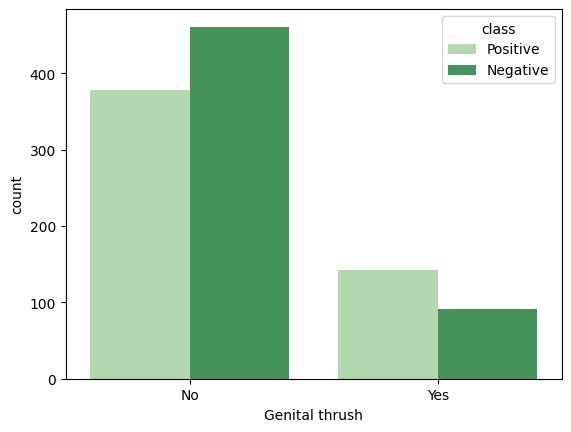

In [295]:


# Visualising the distribution of Genital thrush
genital_thrush_plot = sns.countplot(x=dataFrame['Genital thrush'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Genital thrush', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [296]:
#Analysis based on Genital thrush
dataFrame.groupby("Genital thrush")["class"].value_counts().unstack()

class,Negative,Positive
Genital thrush,,
No,461,378
Yes,91,142


class,Negative,Positive
visual blurring,,
No,76.090000,44.230000
Yes,23.910000,55.770000


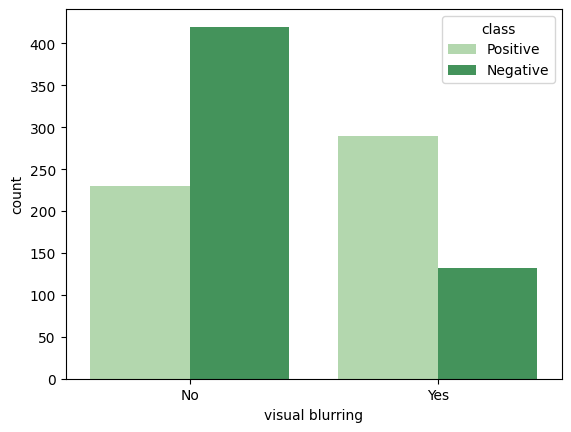

In [297]:


# Visualising the distribution of visual blurring
visual_blurring_plot = sns.countplot(x=dataFrame['visual blurring'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['visual blurring', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [298]:
#Analysis based on visual blurring
dataFrame.groupby("visual blurring")["class"].value_counts().unstack()

class,Negative,Positive
visual blurring,,
No,420,230
Yes,132,290


class,Negative,Positive
Itching,,
No,51.090000,51.920000
Yes,48.910000,48.080000


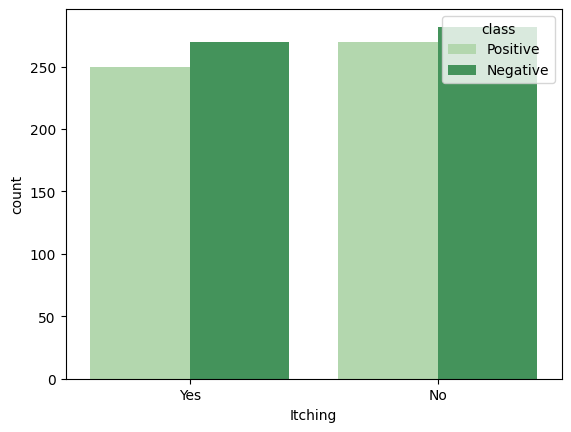

In [299]:


# Visualising the distribution of Itching
itching_plot = sns.countplot(x=dataFrame['Itching'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Itching', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [300]:
#Analysis based on Itching
dataFrame.groupby("Itching")["class"].value_counts().unstack()

class,Negative,Positive
Itching,,
No,282,270
Yes,270,250


class,Negative,Positive
Irritability,,
No,91.490000,66.350000
Yes,8.510000,33.650000


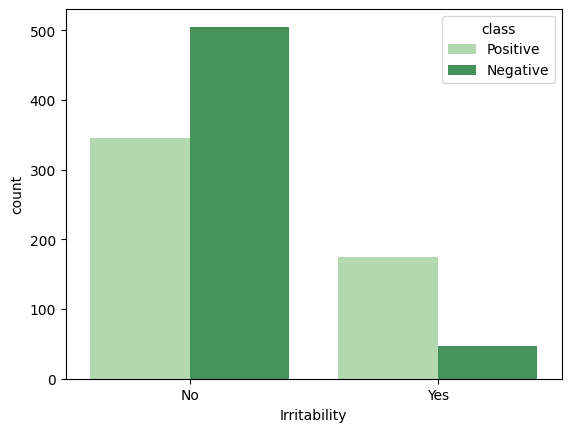

In [301]:


# Visualising the distribution of Irritability
irritability_plot = sns.countplot(x=dataFrame['Irritability'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Irritability', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [302]:
#Analysis based on Irritability
dataFrame.groupby("Irritability")["class"].value_counts().unstack()

class,Negative,Positive
Irritability,,
No,505,345
Yes,47,175


class,Negative,Positive
delayed healing,,
No,55.620000,50.380000
Yes,44.380000,49.620000


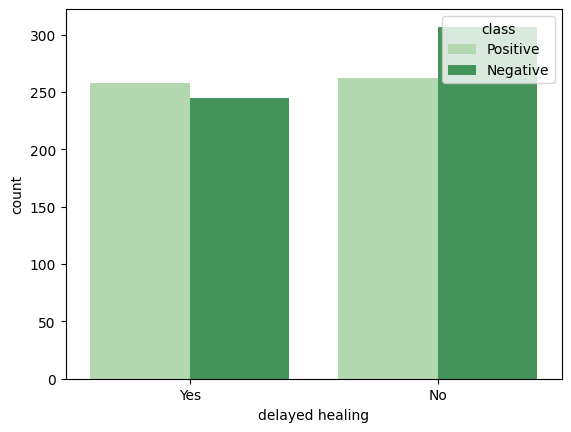

In [303]:


# Visualising the distribution of delayed healing
delayed_healing_plot = sns.countplot(x=dataFrame['delayed healing'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['delayed healing', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [304]:
#Analysis based on delayed healing
dataFrame.groupby("delayed healing")["class"].value_counts().unstack()

class,Negative,Positive
delayed healing,,
No,307,262
Yes,245,258


class,Negative,Positive
partial paresis,,
No,84.960000,40.770000
Yes,15.040000,59.230000


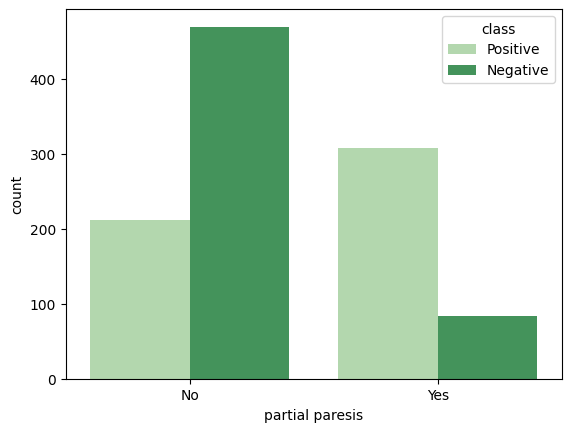

In [305]:


# Visualising the distribution of partial paresis
partial_paresis_plot = sns.countplot(x=dataFrame['partial paresis'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['partial paresis', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [306]:
#Analysis based on partial paresis
dataFrame.groupby("partial paresis")["class"].value_counts().unstack()

class,Negative,Positive
partial paresis,,
No,469,212
Yes,83,308


class,Negative,Positive
muscle stiffness,,
No,69.750000,57.500000
Yes,30.250000,42.500000


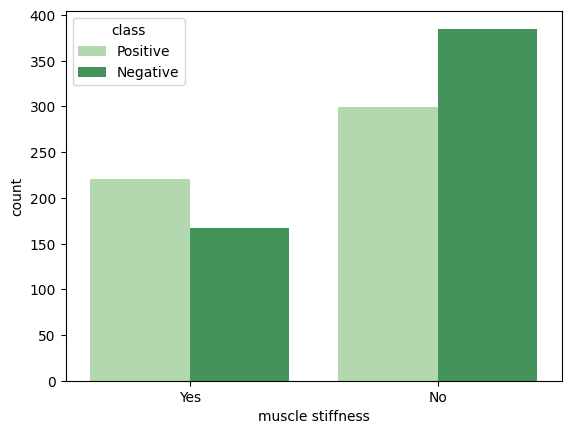

In [307]:


# Visualising the distribution of muscle stiffness
muscle_stiffness_plot = sns.countplot(x=dataFrame['muscle stiffness'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['muscle stiffness', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [308]:
#Analysis based on muscle stiffness
dataFrame.groupby("muscle stiffness")["class"].value_counts().unstack()

class,Negative,Positive
muscle stiffness,,
No,385,299
Yes,167,221


class,Negative,Positive
Alopecia,,
No,48.550000,75.190000
Yes,51.450000,24.810000


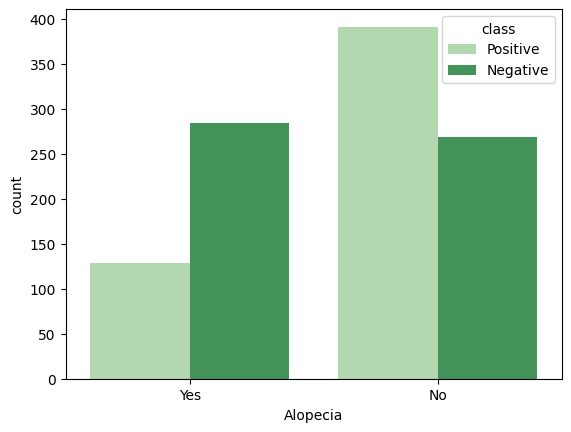

In [309]:


# Visualising the distribution of Alopecia
alopecia_plot = sns.countplot(x=dataFrame['Alopecia'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Alopecia', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [310]:
#Analysis based on Alopecia
dataFrame.groupby("Alopecia")["class"].value_counts().unstack()

class,Negative,Positive
Alopecia,,
No,268,391
Yes,284,129


class,Negative,Positive
Obesity,,
No,85.870000,81.150000
Yes,14.130000,18.850000


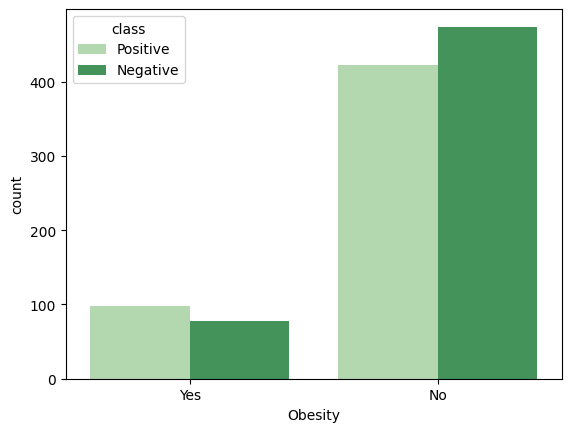

In [311]:


# Visualising the distribution of Obesity
obesity_plot = sns.countplot(x=dataFrame['Obesity'], hue=dataFrame['class'], palette='Greens')

# Defining the criteria for the cross-tabulation
cross_tab_criteria = ['Obesity', 'class']

# Creating a color map
color_map = sns.light_palette("blue", as_cmap=True)

# Creating a cross-tabulation and normalizing the values by column
cross_tab = pd.crosstab(dataFrame[cross_tab_criteria[0]], dataFrame[cross_tab_criteria[1]], normalize='columns')

# Converting the proportions to percentages and rounding to 2 decimal places
cross_tab_percentages = cross_tab.mul(100).round(2)

# Applying a gradient coloring to the table
styled_cross_tab = cross_tab_percentages.style.background_gradient(cmap=color_map)

styled_cross_tab

In [312]:
#Analysis based on Obesity
dataFrame.groupby("Obesity")["class"].value_counts().unstack()

class,Negative,Positive
Obesity,,
No,474,422
Yes,78,98


### Occurences of Symptoms in patients

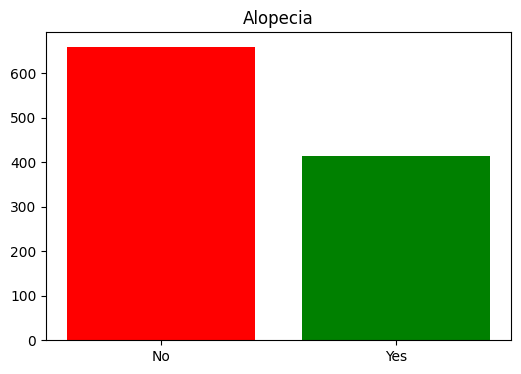

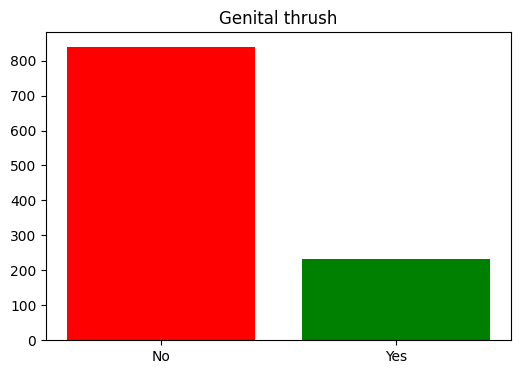

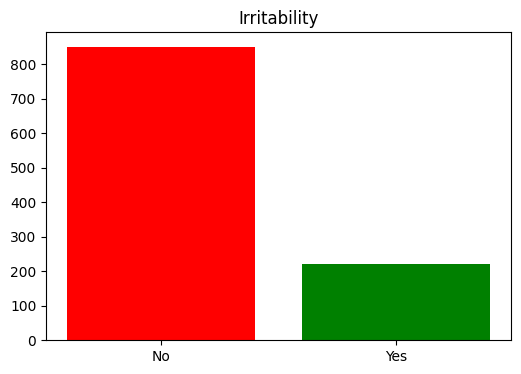

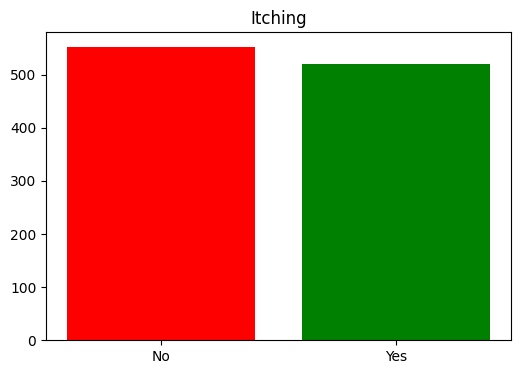

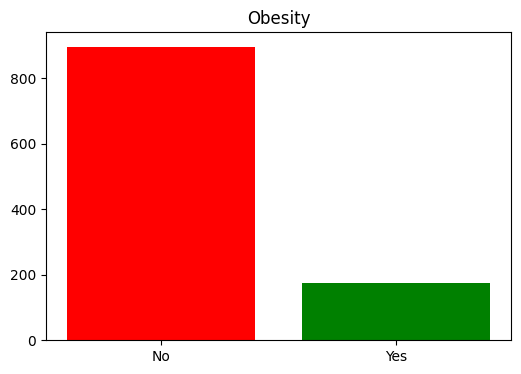

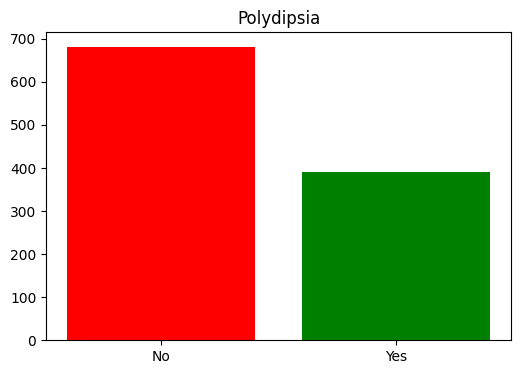

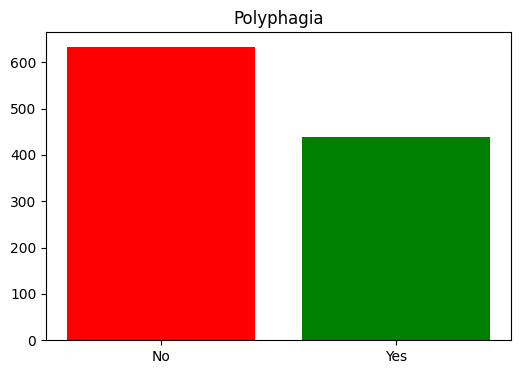

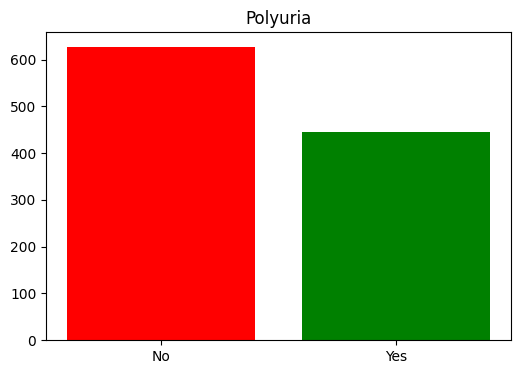

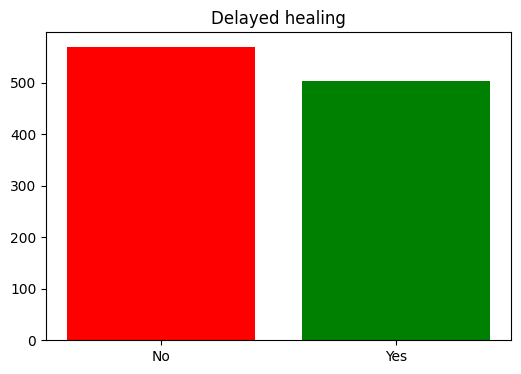

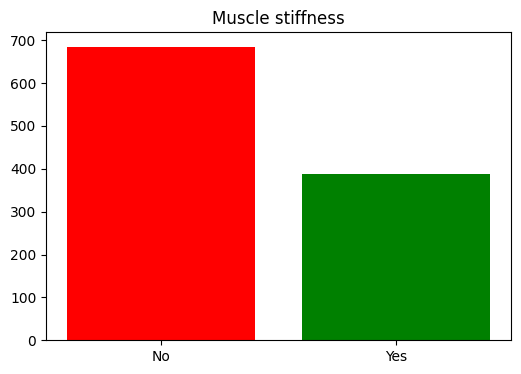

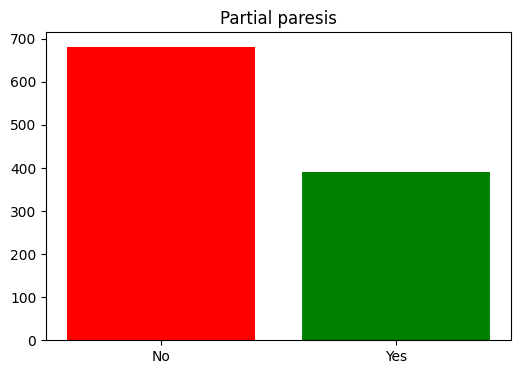

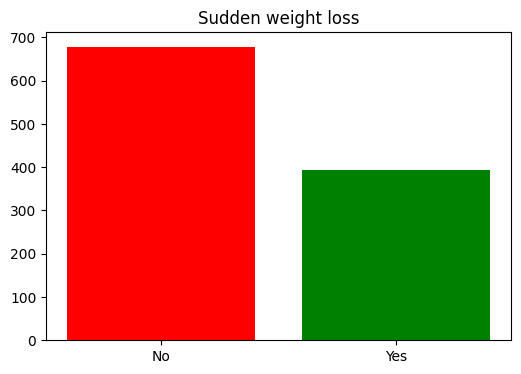

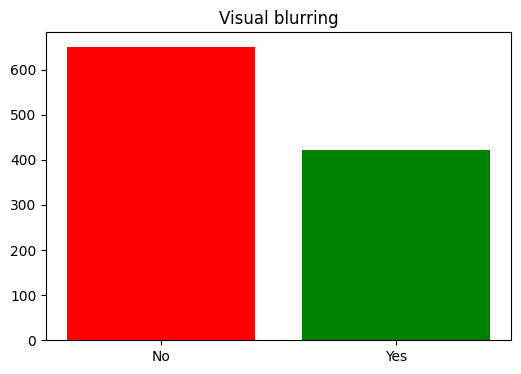

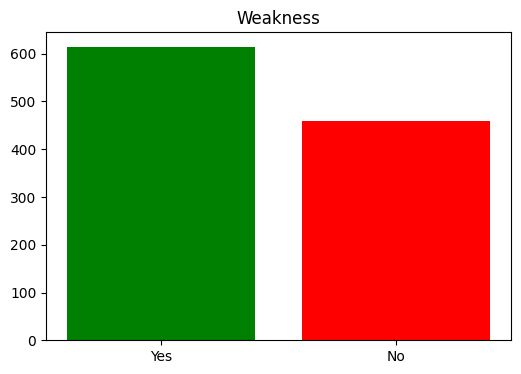

In [313]:

# Define a function to create a bar plot
def plotBar(value, title):
    # Set the figure size
    plt.figure(figsize=(6,4))
    # Get the counts of each unique value in the input series
    value_counts = value.value_counts()
    # Create a list of colors, 'blue' for 'Yes' and 'red' for other values
    colors = ['green' if v == 'Yes' else 'red' for v in value_counts.index]
    # Create a bar plot with the unique values as the x-axis and their counts as the y-axis
    plt.bar(value_counts.index, value_counts.values, color=colors)
    # Set the title of the plot
    plt.title(title)
    # Display the plot
    plt.show()

# Create a new dataframe that includes all columns from the original dataframe except 'Age', 'class', and 'Gender'
df_symptoms = dataFrame[dataFrame.columns.difference(["Age", "class", "Gender"])]

# For each column in the new dataframe
for column in df_symptoms.columns:
    # Call the plotBar function with the column data and the capitalized column name as the title
    plotBar(df_symptoms[column], column.capitalize())


  

In [314]:


# Filter the DataFrame based on the integer value in 'class' column
positive_diabetes = dataFrame[dataFrame["class"] == 1].copy()
positive_diabetes.drop(['Age', 'Gender', 'class'], axis=1, inplace=True)

# Map binary values to 'Yes' and 'No'
positive_diabetes = positive_diabetes.replace({1: 'Yes', 0: 'No'})

# Check and transform the data
symptom_counts = positive_diabetes.apply(pd.Series.value_counts).transpose()

# Ensure 'Yes' and 'No' columns exist
if 'Yes' in symptom_counts.columns and 'No' in symptom_counts.columns:
    symptom_counts['Symptom_Present_Percentage'] = symptom_counts['Yes'] / (symptom_counts['Yes'] + symptom_counts['No']) * 100
    symptom_counts['Symptom_Absent_Percentage'] = symptom_counts['No'] / (symptom_counts['Yes'] + symptom_counts['No']) * 100
    symptom_counts.drop(['Yes', 'No'], inplace=True, axis=1)

    print('\033[1m' + '\n\t People who were tested positive for Diabetes')
    print('**********************************************************')
    sorted_symptoms = symptom_counts.sort_values(by='Symptom_Present_Percentage', ascending=False)
    print(sorted_symptoms)
else:
    print("Error: 'Yes' and/or 'No' columns not found in symptom_counts DataFrame")


Error: 'Yes' and/or 'No' columns not found in symptom_counts DataFrame


### Data Cleaning


In [315]:
#Showing null values 
dataFrame.isna().sum()

 #Handle missing values
# Option 1: Remove rows with missing values
dataFrame = dataFrame.dropna()


# Show the first 50 rows of the cleaned dataset
print(dataFrame.head(5))

   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      

### Data Pre-Processing

In [316]:
# Changing 'Positive' to 1 and 'Negative' to 0
dataFrame['class'] = dataFrame['class'].replace({'Positive': 1, 'Negative': 0})
dataFrame['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [317]:
# Splitting the DataFrame into features and target
features = dataFrame.drop(['class'], axis=1)  # All columns except 'class' are considered as features
target = dataFrame['class']  # 'class' column is the target

In [318]:
# Identify and store columns in the features DataFrame that are of type 'object'
object_columns = features.columns[features.dtypes == 'object']

# Convert the identified columns to lowercase
features.columns = features.columns.str.lower()

#convert column to lowercase
object_columns = object_columns.str.lower()

print(object_columns)

Index(['gender', 'polyuria', 'polydipsia', 'sudden weight loss', 'weakness',
       'polyphagia', 'genital thrush', 'visual blurring', 'itching',
       'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [319]:
# Print the information of the DataFrame
print (features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 1072 non-null   int64 
 1   gender              1072 non-null   object
 2   polyuria            1072 non-null   object
 3   polydipsia          1072 non-null   object
 4   sudden weight loss  1072 non-null   object
 5   weakness            1072 non-null   object
 6   polyphagia          1072 non-null   object
 7   genital thrush      1072 non-null   object
 8   visual blurring     1072 non-null   object
 9   itching             1072 non-null   object
 10  irritability        1072 non-null   object
 11  delayed healing     1072 non-null   object
 12  partial paresis     1072 non-null   object
 13  muscle stiffness    1072 non-null   object
 14  alopecia            1072 non-null   object
 15  obesity             1072 non-null   object
dtypes: int64(1), object(15)


In [320]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each feature in the object list
for column in object_columns:
    # Convert the column to string type and perform label encoding
    features[column] = label_encoder.fit_transform(features[column].astype(str))

# Print the information of the DataFrame
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 1072 non-null   int64
 1   gender              1072 non-null   int64
 2   polyuria            1072 non-null   int64
 3   polydipsia          1072 non-null   int64
 4   sudden weight loss  1072 non-null   int64
 5   weakness            1072 non-null   int64
 6   polyphagia          1072 non-null   int64
 7   genital thrush      1072 non-null   int64
 8   visual blurring     1072 non-null   int64
 9   itching             1072 non-null   int64
 10  irritability        1072 non-null   int64
 11  delayed healing     1072 non-null   int64
 12  partial paresis     1072 non-null   int64
 13  muscle stiffness    1072 non-null   int64
 14  alopecia            1072 non-null   int64
 15  obesity             1072 non-null   int64
dtypes: int64(16)
memory usage: 134.1 KB
None


In [321]:
features.head(5)

,age,gender,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


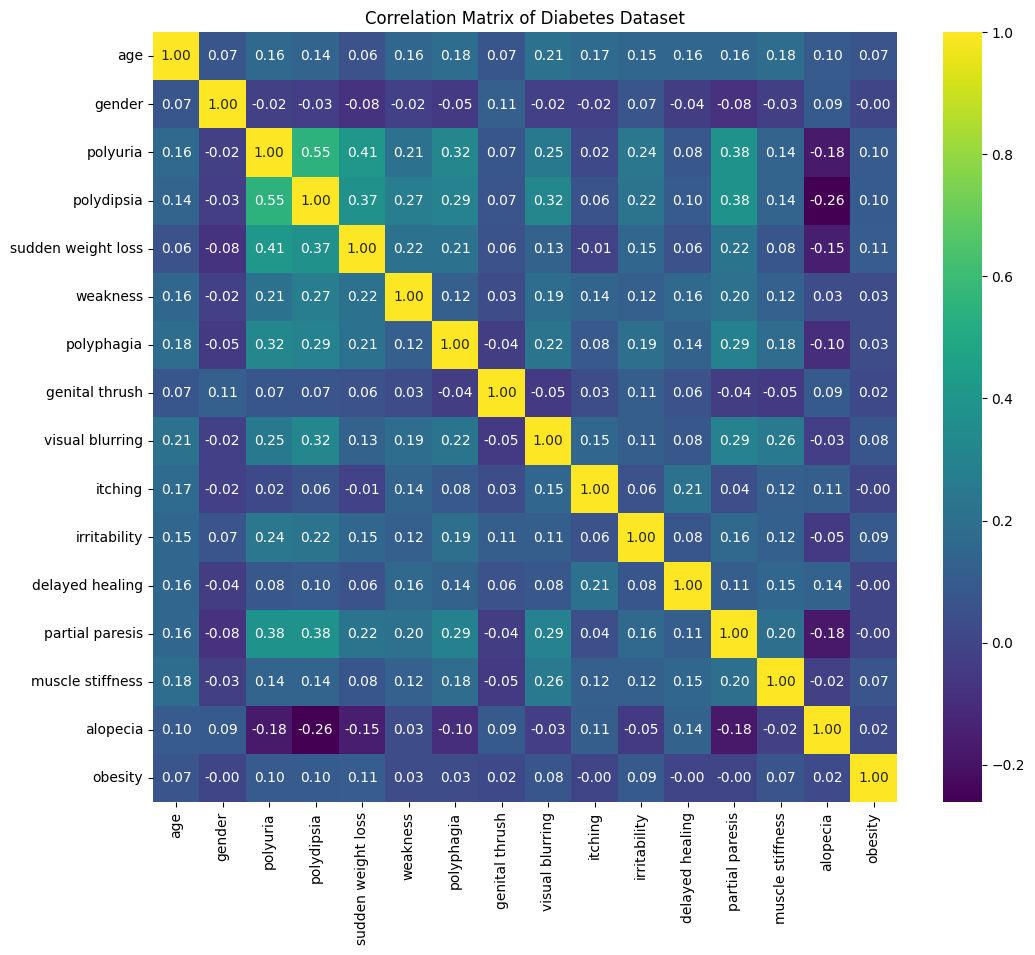

In [322]:


# Compute the correlation matrix
correlation_matrix = features.corr()

# Create a new figure for the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Create a heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', ax=ax)

# Set the title of the heatmap
heatmap.set_title("Correlation Matrix of Diabetes Dataset")

# Display the plot
plt.show()

In [323]:

# Select the 10 best features based on the chi-squared (chi^2) statistical test for non-negative features
k_best_selector = SelectKBest(score_func=chi2, k=10)
fitted_selector = k_best_selector.fit(features, target)

# Create a DataFrame with the scores from the chi^2 test
score_data = pd.DataFrame(fitted_selector.scores_)

# Create a DataFrame with the column names
column_data = pd.DataFrame(features.columns)

# Concatenate the two DataFrames along the columns
feature_scores = pd.concat([column_data, score_data], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores

,Feature,Score
0,age,66.771032
1,gender,0.556717
2,polyuria,291.955117
3,polydipsia,322.005531
4,sudden weight loss,141.200287
5,weakness,28.544644
6,polyphagia,82.396228
7,genital thrush,14.428341
8,visual blurring,69.026772
9,itching,0.038590


In [324]:
# Select the top 10 features based on chi-squared scores
top_chi2_features = feature_scores.nlargest(10, 'Score')
top_chi2_features

,Feature,Score
3,polydipsia,322.005531
2,polyuria,291.955117
12,partial paresis,143.384712
4,sudden weight loss,141.200287
6,polyphagia,82.396228
10,irritability,81.714223
8,visual blurring,69.026772
0,age,66.771032
14,alopecia,49.330149
5,weakness,28.544644


In [325]:
# Get the names of the top 10 features selected by the chi-squared test
top_chi2_features = fitted_selector.get_support(indices=True)
top_chi2_features = [column for column in features.columns[top_chi2_features]]
top_chi2_features

['age',
 'polyuria',
 'polydipsia',
 'sudden weight loss',
 'weakness',
 'polyphagia',
 'visual blurring',
 'irritability',
 'partial paresis',
 'alopecia']

<Axes: >

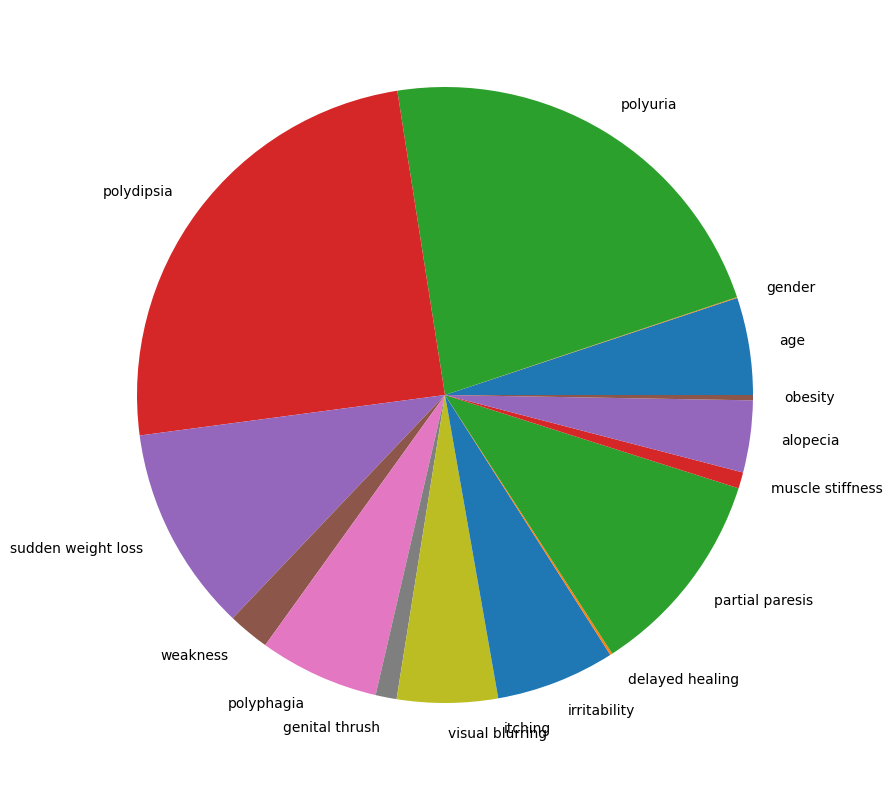

In [326]:

#pie chart of the features
featureview = pd.Series(fitted_selector.scores_, index=features.columns)
featureview.plot(kind='pie', figsize=(10, 10))  # Increase the size as needed


In [327]:
# Select features with a variance higher than 0.5 * (1 - 0.5)
#variance_selector = VarianceThreshold(threshold=(0.5 * (1 - 0.5)))
variance_selector = VarianceThreshold(threshold=0.24)
fitted_variance = variance_selector.fit(features)
print(fitted_variance)

# Create a DataFrame with the variances
variance_data = pd.DataFrame(fitted_variance.variances_)

# Create a DataFrame with the column names
column_data1 = pd.DataFrame(features.columns)

# Concatenate the two DataFrames along the columns
high_variance_features = pd.concat([variance_data, column_data1], axis=1)
high_variance_features.columns = ['Variance', 'Feature']

# Select the features with a variance higher than 0.2
top_variance_features = high_variance_features[high_variance_features['Variance'] > 0.24]
top_variance_features

VarianceThreshold(threshold=0.24)


,Variance,Feature
0,145.091515,age
1,0.249777,gender
2,0.242794,polyuria
5,0.244706,weakness
6,0.241812,polyphagia
9,0.249777,itching
11,0.249052,delayed healing


In [328]:
# Get the names of the features selected by the variance threshold
selected_features_indices = fitted_variance.get_support(indices=True)
selected_features = [column for column in features.columns[selected_features_indices]]
selected_features

['age',
 'gender',
 'polyuria',
 'weakness',
 'polyphagia',
 'itching',
 'delayed healing']

In [329]:
# Combine the selected features
final_selected_features = list(set(top_chi2_features).union(set(selected_features)))
print(final_selected_features)
# Select these features from the original dataset
X_final = features[final_selected_features]


#head of the selected features
X_final.head(5)



['weakness', 'polyphagia', 'itching', 'sudden weight loss', 'alopecia', 'age', 'partial paresis', 'gender', 'delayed healing', 'polydipsia', 'irritability', 'visual blurring', 'polyuria']


,weakness,polyphagia,itching,sudden weight loss,alopecia,age,partial paresis,gender,delayed healing,polydipsia,irritability,visual blurring,polyuria
0,1,0,1,0,1,40,0,1,1,1,0,0,0
1,1,0,0,0,1,58,1,1,0,0,0,1,0
2,1,1,1,0,1,41,0,1,1,0,0,0,1
3,1,1,1,1,0,45,0,1,1,0,0,0,0
4,1,1,1,1,1,60,1,1,1,1,1,1,1


### Splitting the dataset into training and testing sets

In [330]:
# Split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X_final, target, test_size = 0.2, random_state=0)


### Data Normalisation

In [331]:
import joblib
# MinMax Scaling
minmax = MinMaxScaler()
X_train[['age']] = minmax.fit_transform(X_train[['age']])
X_test[['age']] = minmax.transform(X_test[['age']])

# Save the fitted scaler
joblib.dump(minmax, 'minmax_scaler.pkl')

X_train.head()

,weakness,polyphagia,itching,sudden weight loss,alopecia,age,partial paresis,gender,delayed healing,polydipsia,irritability,visual blurring,polyuria
34,1,0,1,0,0,0.445946,0,1,0,1,0,1,1
780,0,0,1,0,0,0.432432,1,0,0,1,0,0,1
30,1,1,0,1,0,0.554054,1,1,0,1,0,1,1
457,1,1,1,1,0,0.432432,1,0,1,1,1,1,1
904,0,1,0,0,0,0.351351,0,0,0,0,0,0,0


### Model Building/Logistic Regression

It's good for binary classification problems like diabetes (yes or no). It's interpretable and works well with smaller datasets.

In [332]:


# Define the Logistic Regression model
log_reg_model = LogisticRegression(random_state=0, penalty='l2')

# Train the model
log_reg_model.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10)

# Compute cross-validation scores
cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_predict_lr = log_reg_model.predict(X_test)

# Compute evaluation metrics
acc_score = accuracy_score(y_test, y_predict_lr)
prec_score = precision_score(y_test,y_predict_lr)
rec_score = recall_score(y_test, y_predict_lr)
f1_sc = f1_score(y_test, y_predict_lr)

# Store the results in a DataFrame
log_reg_results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [acc_score],
    'Cross Val Accuracy': [cv_scores.mean()],
    'Precision': [prec_score],
    'Recall': [rec_score],
    'F1 Score': [f1_sc]
})

# Display the results
log_reg_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.906977,0.89264,0.925532,0.87,0.896907


### Model Building/Random Forest



In [333]:

# Define the Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Train the model
random_forest_model.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

# Compute cross-validation scores
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_predict_rf = random_forest_model.predict(X_test)

# Compute evaluation metrics
acc_score_rf = accuracy_score(y_test, y_predict_rf)
prec_score_rf = precision_score(y_test, y_predict_rf)
rec_score_rf = recall_score(y_test, y_predict_rf)
f1_sc_rf = f1_score(y_test, y_predict_rf)

# Store the results in a DataFrame
random_forest_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Accuracy': [acc_score_rf],
    'Cross Val Accuracy': [cv_scores_rf.mean()],
    'Precision': [prec_score_rf],
    'Recall': [rec_score_rf],
    'F1 Score': [f1_sc_rf]
})

# Display the results
random_forest_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.95814,0.935773,0.969072,0.94,0.954315


### Model Building/ Neural Network

In [334]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.optimizers import Adam

# Neural Network Model
def create_model(input_dim):
    # Define the model
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

# Create the neural network model
nn_model = create_model(X_train.shape[1])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the neural network
nn_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=10, 
                          verbose=1, callbacks=[early_stopping], validation_split=0.1)

# Predict the target for the test data
y_predict_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Compute evaluation metrics
nn_acc_score = accuracy_score(y_test, y_predict_nn)
nn_prec_score = precision_score(y_test,y_predict_nn)
nn_rec_score = recall_score(y_test, y_predict_nn)
nn_f1_sc = f1_score(y_test, y_predict_nn)

# Store the results in a DataFrame
result_nn = pd.DataFrame([['Neural Network', nn_acc_score, nn_prec_score,nn_rec_score, nn_f1_sc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Display the results
result_nn 


Epoch 1/100


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5940 - loss: 0.6647 - val_accuracy: 0.6512 - val_loss: 0.6033
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7487 - loss: 0.5582 - val_accuracy: 0.8372 - val_loss: 0.5070
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8407 - loss: 0.4606 - val_accuracy: 0.8605 - val_loss: 0.4295
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8865 - loss: 0.3836 - val_accuracy: 0.8837 - val_loss: 0.3719
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.8965 - loss: 0.3404 - val_accuracy: 0.9070 - val_loss: 0.3367
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.9071 - loss: 0.3021 - val_accuracy: 0.9186 - val_loss: 0.3136
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8942 - loss: 0.2854 - val_accuracy: 0.9186 - val_loss: 0.3001
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9052 - loss: 0.2658 - val_accuracy: 0.9186 -

,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.939535,0.957895,0.91,0.933333


### Model Building/ Support Vector Machines (SVM)

In [335]:

# Define the SVM model
svm_classifier = svm.SVC(kernel='linear', random_state=0)

# Train the model
svm_classifier.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10)

# Compute cross-validation scores
cv_scores_svm = cross_val_score(svm_classifier, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_pred_svm = svm_classifier.predict(X_test)

# Compute evaluation metrics
acc_score_svm = accuracy_score(y_test, y_pred_svm)
prec_score_svm = precision_score(y_test, y_pred_svm)
rec_score_svm = recall_score(y_test, y_pred_svm)
f1_sc_svm = f1_score(y_test, y_pred_svm)

# Store the results in a DataFrame
results_svm = pd.DataFrame({
    'Model': ['SVM'],
    'Accuracy': [acc_score_svm],
    'Cross Val Accuracy': [cv_scores_svm.mean()],
    'Precision': [prec_score_svm],
    'Recall': [rec_score_svm],
    'F1 Score': [f1_sc_svm]
})

# Display the results
results_svm

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,SVM,0.911628,0.887948,0.935484,0.87,0.901554


### Model Building/ K Nearest Neighbors

In [336]:


# Define the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn_classifier.fit(X_train, y_train)

# Define the cross-validation strategy
strat_k_fold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Compute cross-validation scores
cv_scores_knn = cross_val_score(knn_classifier, X_train, y_train, cv=strat_k_fold, scoring='accuracy')

# Predict the target for the test data
y_predict_knn = knn_classifier.predict(X_test)

# Compute evaluation metrics
acc_score_knn = accuracy_score(y_test, y_predict_knn)
prec_score_knn = precision_score(y_test,y_predict_knn)
rec_score_knn = recall_score(y_test, y_predict_knn)
f1_sc_knn = f1_score(y_test,y_predict_knn)

# Store the results in a DataFrame
knn_results = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [acc_score_knn],
    'Cross Val Accuracy': [cv_scores_knn.mean()],
    'Precision': [prec_score_knn],
    'Recall': [rec_score_knn],
    'F1 Score': [f1_sc_knn]
})

# Display the results
knn_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,KNN,0.944186,0.903133,0.958333,0.92,0.938776


In [337]:
# Combine the results of all models
combined_results = pd.concat([log_reg_results, results_svm, knn_results,result_nn,random_forest_results], ignore_index=True)

# Display the combined results
combined_results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.906977,0.892640,0.925532,0.87,0.896907
1,SVM,0.911628,0.887948,0.935484,0.87,0.901554
2,KNN,0.944186,0.903133,0.958333,0.92,0.938776
3,Neural Network,0.939535,NaN,0.957895,0.91,0.933333
4,Random Forest,0.958140,0.935773,0.969072,0.94,0.954315


### Confusion matrix to visualizse the performance of the models

In [338]:
# Assuming y_test is your actual test labels and y_predict_* are the predicted labels from each model
y_predict_lr = log_reg_model.predict(X_test) # Logistic Regression predictions
y_predict_svm = svm_classifier.predict(X_test) # SVM predictions
y_predict_rf = random_forest_model.predict(X_test) # Random Forest predictions
y_predict_knn = knn_classifier.predict(X_test) # Random Forest predictions


In [339]:

# Check the unique values in the predictions and the target variable
print("Unique values in y_test:", pd.unique(y_test))
print("Unique values in y_predict_lr:", pd.unique(y_predict_lr))
print("Unique values in y_predict_svm:", pd.unique(y_predict_svm))
print("Unique values in y_predict_rf:", pd.unique(y_predict_rf))
print("Unique values in y_predict_knn:", pd.unique(y_predict_knn))

Unique values in y_test: [0 1]
Unique values in y_predict_lr: [0 1]
Unique values in y_predict_svm: [0 1]
Unique values in y_predict_rf: [0 1]
Unique values in y_predict_knn: [0 1]


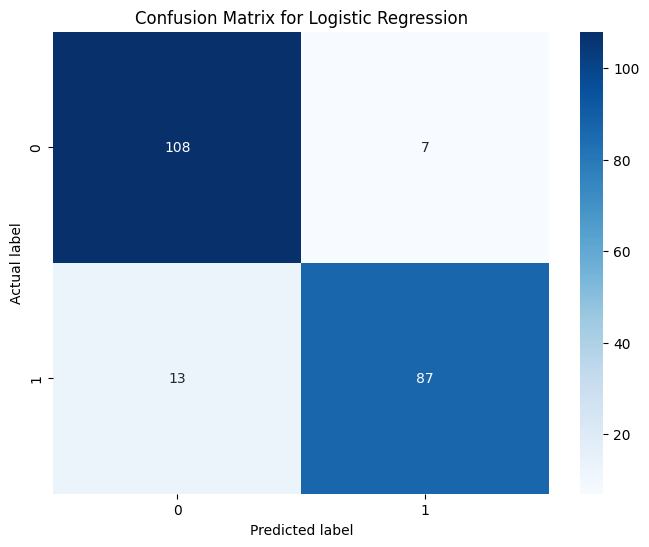

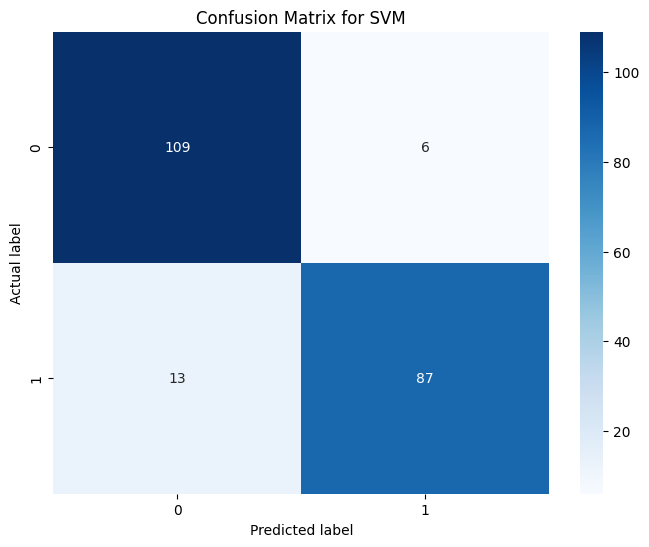

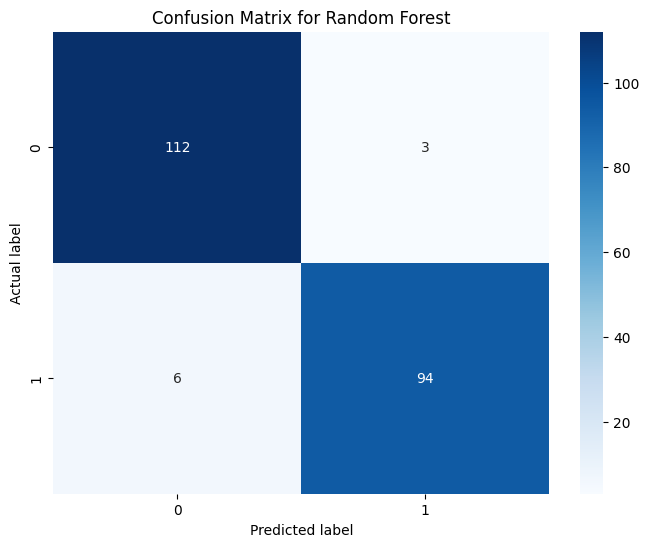

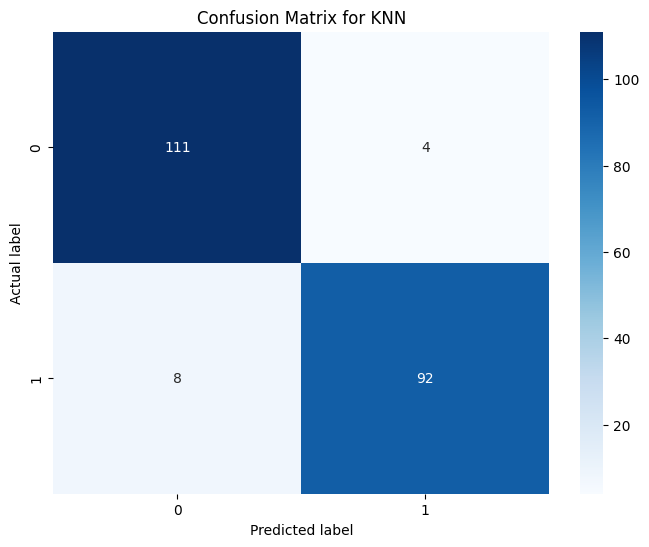

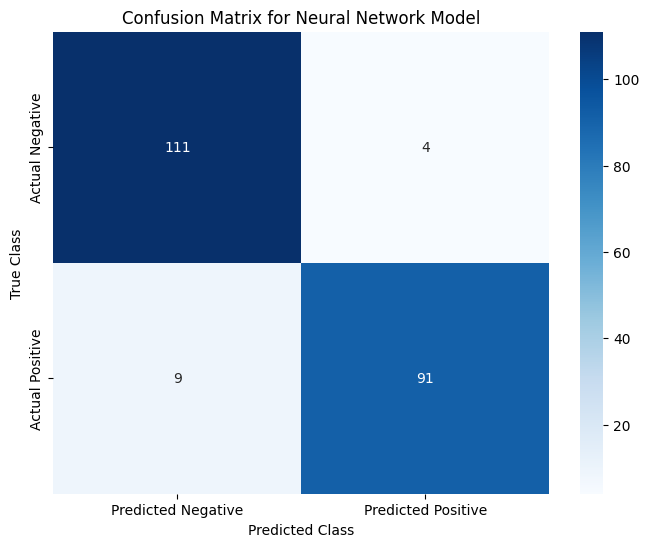

In [340]:

# Create confusion matrices for each model
cm_lr = confusion_matrix(y_test, y_predict_lr)
cm_svm = confusion_matrix(y_test, y_predict_svm)
cm_rf = confusion_matrix(y_test, y_predict_rf)
cm_knn = confusion_matrix(y_test, y_predict_knn)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# Plotting confusion matrices
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_svm, "SVM")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_knn, "KNN")

plt.show()

# Generate the confusion matrix for the neural network model
nn_confusion_matrix = confusion_matrix(y_test,y_predict_nn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nn_confusion_matrix, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Neural Network Model')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


### Model Testing


In [343]:
import unittest
import pandas as pd
import joblib

class TestAllModels(unittest.TestCase):
    @classmethod
    def setUp(cls):
        # Load your test dataset
        cls.dataset = pd.read_csv('../../AIBetic2Dataset/test_model_dataset.csv')

        
        # Convert categorical columns to numerical
        columns_to_convert = ['delayed healing', 'Polyuria', 'Alopecia', 'Gender', 'Itching', 'visual blurring', 'weakness', 'partial paresis', 'Polydipsia', 'Polyphagia', 'sudden weight loss', 'Irritability']
        for column in columns_to_convert:
            cls.dataset[column] = cls.dataset[column].replace({'Yes': 1, 'No': 0})
        cls.dataset['Gender'] = cls.dataset['Gender'].replace({'Male': 1, 'Female': 0})

        cls.dataset['class'] = cls.dataset['class'].replace({'Positive': 1, 'Negative': 0})

        


        # Convert column names to lowercase
        cls.dataset.columns = cls.dataset.columns.str.lower()

         # Load the MinMaxScaler that was fitted on the training data
        cls.minmax_scaler = joblib.load('minmax_scaler.pkl')

        # Normalize 'age' using the loaded scaler
        cls.dataset['age'] = cls.minmax_scaler.transform(cls.dataset[['age']])

        # Select columns
        trained_features = ['weakness', 'polyphagia', 'itching', 'sudden weight loss', 'alopecia', 'age', 'partial paresis', 'gender', 'delayed healing', 'polydipsia', 'irritability', 'visual blurring', 'polyuria']
        cls.dataset = cls.dataset[trained_features + ['class']]

        # Split the dataset into features and target
        cls.X_test = cls.dataset.drop('class', axis=1)
        cls.y_test = cls.dataset['class']
        
    def test_svm(self):
        y_pred = svm_classifier.predict(self.X_test)
        print("Model: Support Vector Machine")
        print(pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred}))

    def test_log_reg(self):
        y_pred = log_reg_model.predict(self.X_test)
        print("Model: Logistic Regression")
        print(pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred}))

    def test_nn(self):
        y_pred = nn_model.predict(self.X_test)
        y_pred = (y_pred > 0.5).astype(int)
        y_pred = y_pred.flatten()
        print("Model: Neural Network")
        print(pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred}))

    def test_knn(self):
        y_pred = knn_classifier.predict(self.X_test)
        print("Model: K-Nearest Neighbors")
        print(pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred}))

    def test_random_forest(self):
        y_pred = random_forest_model.predict(self.X_test)
        print("Model: Random Forest")
        print(pd.DataFrame({'Actual': self.y_test, 'Predicted': y_pred}))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..

Model: K-Nearest Neighbors
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        0          0
7        0          0
8        0          0
9        0          1
10       0          0
11       0          0
Model: Logistic Regression
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        0          1
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


...
----------------------------------------------------------------------
Ran 5 tests in 0.059s

OK


Model: Neural Network
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
Model: Random Forest
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
Model: Support Vector Machine
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        0          1
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
